In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [3]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [4]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [6]:
# target
train.Claim.value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

<AxesSubplot:xlabel='Claim', ylabel='count'>

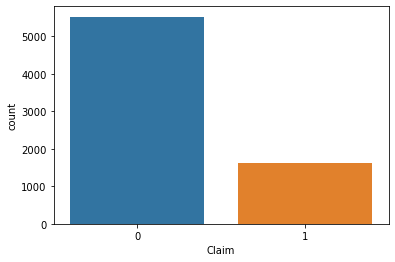

In [7]:
sns.countplot(x=train.Claim,data = train)

In [8]:
train.NumberOfWindows.value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

In [9]:
train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [10]:
train.Garden.fillna('xxx',inplace=True)
train['Building Dimension'].fillna(train['Building Dimension'].mean(), inplace=True)
train['Geo_Code']= pd.to_numeric(train['Geo_Code'],errors='coerce')

In [11]:
train['Geo_Code'].fillna(train['Geo_Code'].mean(), inplace=True)
train.Geo_Code.unique()

array([ 1053.        ,  1143.        ,  1160.        , ...,
       95598.        , 95607.        , 50864.64549356])

In [12]:
train['NumberOfWindows'].value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

In [13]:
train['NumberOfWindows'] = pd.to_numeric(train['NumberOfWindows'], errors='coerce')
train['NumberOfWindows'].fillna(train.NumberOfWindows.mean(), inplace=True)

In [14]:
train.Date_of_Occupancy.fillna(train.Date_of_Occupancy.mean(), inplace=True)

In [15]:
# Encoding categorical features.

train['Building_Painted']= pd.get_dummies(train['Building_Painted'])
train['Building_Fenced']= pd.get_dummies(train['Building_Fenced'])
train['Garden']= pd.get_dummies(train['Garden'])
train['Settlement']= pd.get_dummies(train['Settlement'])


In [16]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,0,0,290.0,1,1960.0,4.225296,1053.0,0
1,H2037,2015,1.0,0,0,1,1,1,490.0,1,1850.0,4.000000,1053.0,0
2,H3802,2014,1.0,0,1,0,0,0,595.0,1,1960.0,4.225296,1053.0,0
3,H3834,2013,1.0,0,0,0,0,0,2840.0,1,1960.0,4.225296,1053.0,0
4,H5053,2014,1.0,0,0,1,1,1,680.0,1,1800.0,3.000000,1053.0,0


In [17]:
train.isna().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [18]:
train.shape

(7160, 14)

In [19]:
# SHOW CORRELATION OF DATA TO THE TARGET COLUMN 
features_corr = pd.DataFrame(abs(train.corr()['Claim']).sort_values(ascending = False)) 

features_corr

,Claim
Claim,1.000000
Building Dimension,0.295216
NumberOfWindows,0.169170
Building_Type,0.112168
Insured_Period,0.088715
Residential,0.063509
Settlement,0.052019
Garden,0.051902
Building_Fenced,0.051657
Building_Painted,0.029857


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X = train.drop(['Customer Id', 'Claim'],1)
y = train.Claim

In [22]:
X.shape, y.shape

((7160, 12), (7160,))

In [23]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=1)

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
512/2

256.0

In [27]:
classifier = Sequential()

In [52]:
classifier.add(Dense(16, activation = "relu", input_dim=12))
classifier.add(Dense(8, activation = "relu", input_dim=12))

In [53]:
classifier.add(Dense(1, activation = "sigmoid"))

In [54]:
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [55]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
537/537 [==============================] - 10s 16ms/step - loss: 0.5969 - accuracy: 0.7757
Epoch 2/10
537/537 [==============================] - 9s 16ms/step - loss: 0.5442 - accuracy: 0.7661
Epoch 3/10
537/537 [==============================] - 8s 14ms/step - loss: 0.5317 - accuracy: 0.7765
Epoch 4/10
537/537 [==============================] - 7s 12ms/step - loss: 0.5315 - accuracy: 0.7766
Epoch 5/10
537/537 [==============================] - 5s 10ms/step - loss: 0.5419 - accuracy: 0.7684
Epoch 6/10
537/537 [==============================] - 6s 11ms/step - loss: 0.5318 - accuracy: 0.7765
Epoch 7/10
537/537 [==============================] - 6s 11ms/step - loss: 0.5379 - accuracy: 0.7721
Epoch 8/10
537/537 [==============================] - 7s 14ms/step - loss: 0.5288 - accuracy: 0.7789
Epoch 9/10
537/537 [==============================] - 6s 12ms/step - loss: 0.5196 - accuracy: 0.7860
Epoch 10/10
537/537 [==============================] - 7s 13ms/step - loss: 0.5412 - accur

In [67]:
y_pred = classifier.predict(X_test)